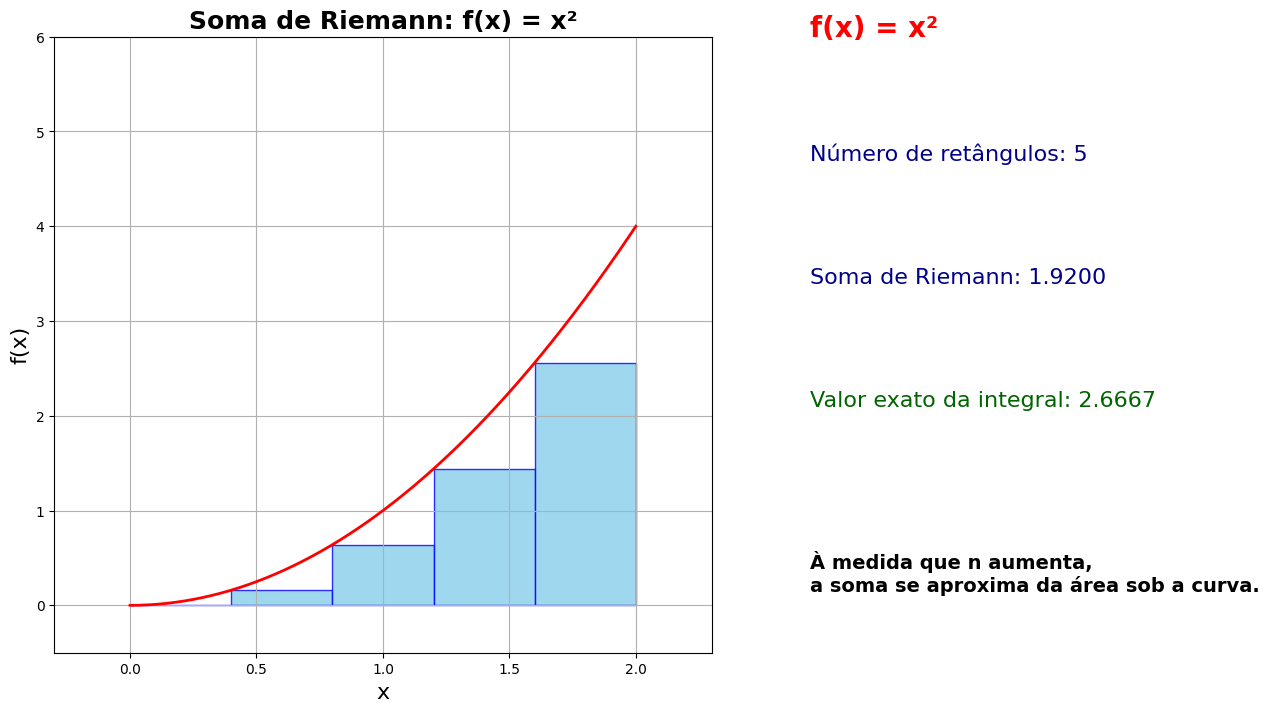

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

# Função a ser integrada
def f(x):
    return x**2

# Limites de integração
a = 0
b = 2

# Valor exato da integral
valor_exato = (b**3 / 3) - (a**3 / 3)

# Curva para plotagem
x_curve = np.linspace(a, b, 500)
y_curve = f(x_curve)

# Valores de n para animação
n_values = list(range(5, 130, 5))  # 10, 20, ..., 120
frames_data = []

# Gerar dados dos retângulos
for n in n_values:
    dx = (b - a) / n
    x_points = np.arange(a, b, dx)
    heights = f(x_points)
    soma_riemann = np.sum(heights * dx)
    rects = []
    for x0, h in zip(x_points, heights):
        rects.append({
            'x': [x0, x0 + dx, x0 + dx, x0],
            'y': [0, 0, h, h],
            'n': n,
            'soma': soma_riemann
        })
    frames_data.append(rects)

# Criar figura com dois subplots: gráfico + texto
fig, (ax_plot, ax_text) = plt.subplots(1, 2, figsize=(14, 8), gridspec_kw={'width_ratios': [2, 1]})

def update(frame_index):
    ax_plot.clear()
    ax_text.clear()

    n = n_values[frame_index]
    rects = frames_data[frame_index]
    soma = rects[0]['soma']

    # Plotar retângulos
    for rect in rects:
        ax_plot.fill(rect['x'], rect['y'], facecolor='skyblue', edgecolor='blue', alpha=0.8)

    # Plotar curva
    ax_plot.plot(x_curve, y_curve, color='red', linewidth=2)
    ax_plot.set_xlim(a - 0.3, b + 0.3)
    ax_plot.set_ylim(-0.5, max(y_curve) * 1.5)
    ax_plot.set_xlabel("x", fontsize=16)
    ax_plot.set_ylabel("f(x)", fontsize=16)
    ax_plot.set_title("Soma de Riemann: f(x) = x²", fontsize=18, weight='bold')
    ax_plot.grid(True)

    # Texto explicativo ao lado
    ax_text.axis('off')
    ax_text.text(0, 1.0, "f(x) = x²", fontsize=20, fontweight='bold', color='red')
    ax_text.text(0, 0.8, f"Número de retângulos: {n}", fontsize=16, color='darkblue')
    ax_text.text(0, 0.6, f"Soma de Riemann: {soma:.4f}", fontsize=16, color='darkblue')
    ax_text.text(0, 0.4, f"Valor exato da integral: {valor_exato:.4f}", fontsize=16, color='darkgreen')
    ax_text.text(0, 0.1, "À medida que n aumenta,\na soma se aproxima da área sob a curva.",
                 fontsize=14, fontweight='bold')

# Criar animação
ani = animation.FuncAnimation(
    fig, update, frames=len(n_values), repeat=False, interval=3000  # 3 segundos por frame
)

# Salvar como vídeo
output_dir = "animacoes"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "soma_riemann_fx2_n_de_10_em_10.mp4")
ani.save(output_path, writer='ffmpeg', fps=1)

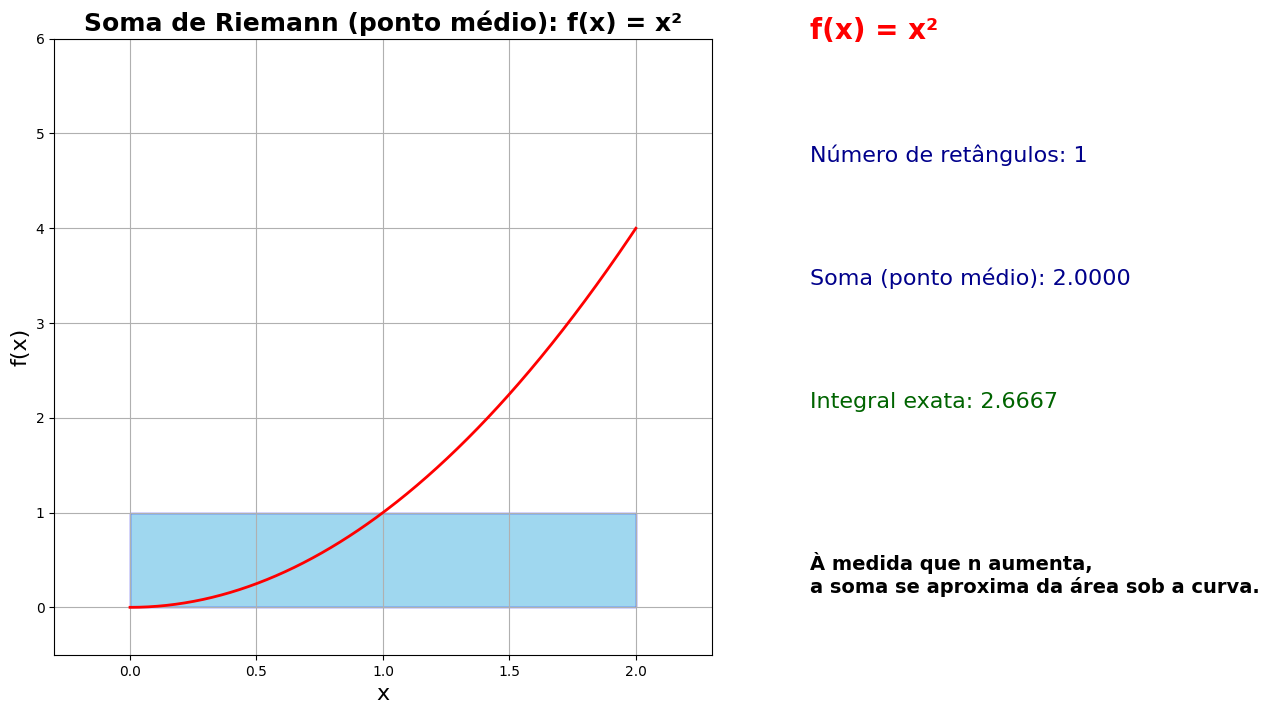

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

# Função a ser integrada
def f(x):
    return x**2

# Limites de integração
a = 0
b = 2

# Valor exato da integral de x² de 0 a 2
valor_exato = (b**3 / 3) - (a**3 / 3)

# Pontos para plotar a curva
x_curve = np.linspace(a, b, 500)
y_curve = f(x_curve)

# Valores de n (número de retângulos)
n_values = list(range(1, 11, 1))  # 10, 20, ..., 120
frames_data = []

# Gerar dados usando o método do ponto médio
for n in n_values:
    dx = (b - a) / n
    x_left = np.arange(a, b, dx)
    midpoints = x_left + dx / 2
    heights = f(midpoints)
    soma_riemann = np.sum(heights * dx)
    rects = []
    for x0, h in zip(x_left, heights):
        rects.append({
            'x': [x0, x0 + dx, x0 + dx, x0],
            'y': [0, 0, h, h],
            'n': n,
            'soma': soma_riemann
        })
    frames_data.append(rects)

# Criar figura com dois subplots (gráfico e texto)
fig, (ax_plot, ax_text) = plt.subplots(1, 2, figsize=(14, 8), gridspec_kw={'width_ratios': [2, 1]})

def update(frame_index):
    ax_plot.clear()
    ax_text.clear()

    n = n_values[frame_index]
    rects = frames_data[frame_index]
    soma = rects[0]['soma']

    # Gráfico com retângulos
    for rect in rects:
        ax_plot.fill(rect['x'], rect['y'], facecolor='skyblue', edgecolor='blue', alpha=0.8)

    ax_plot.plot(x_curve, y_curve, color='red', linewidth=2)
    ax_plot.set_xlim(a - 0.3, b + 0.3)
    ax_plot.set_ylim(-0.5, max(y_curve) * 1.5)
    ax_plot.set_xlabel("x", fontsize=16)
    ax_plot.set_ylabel("f(x)", fontsize=16)
    ax_plot.set_title("Soma de Riemann (ponto médio): f(x) = x²", fontsize=18, weight='bold')
    ax_plot.grid(True)

    # Texto explicativo ao lado
    ax_text.axis('off')
    ax_text.text(0, 1.0, "f(x) = x²", fontsize=20, fontweight='bold', color='red')
    ax_text.text(0, 0.8, f"Número de retângulos: {n}", fontsize=16, color='darkblue')
    ax_text.text(0, 0.6, f"Soma (ponto médio): {soma:.4f}", fontsize=16, color='darkblue')
    ax_text.text(0, 0.4, f"Integral exata: {valor_exato:.4f}", fontsize=16, color='darkgreen')
    ax_text.text(0, 0.1, "À medida que n aumenta,\na soma se aproxima da área sob a curva.",
                 fontsize=14, fontweight='bold')

# Criar animação
ani = animation.FuncAnimation(
    fig, update, frames=len(n_values), repeat=False, interval=3000  # 3s por frame
)

# Salvar o vídeo
output_dir = "animacoes"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "soma_riemann_ponto_medio_fx2.mp4")
ani.save(output_path, writer='ffmpeg', fps=1)

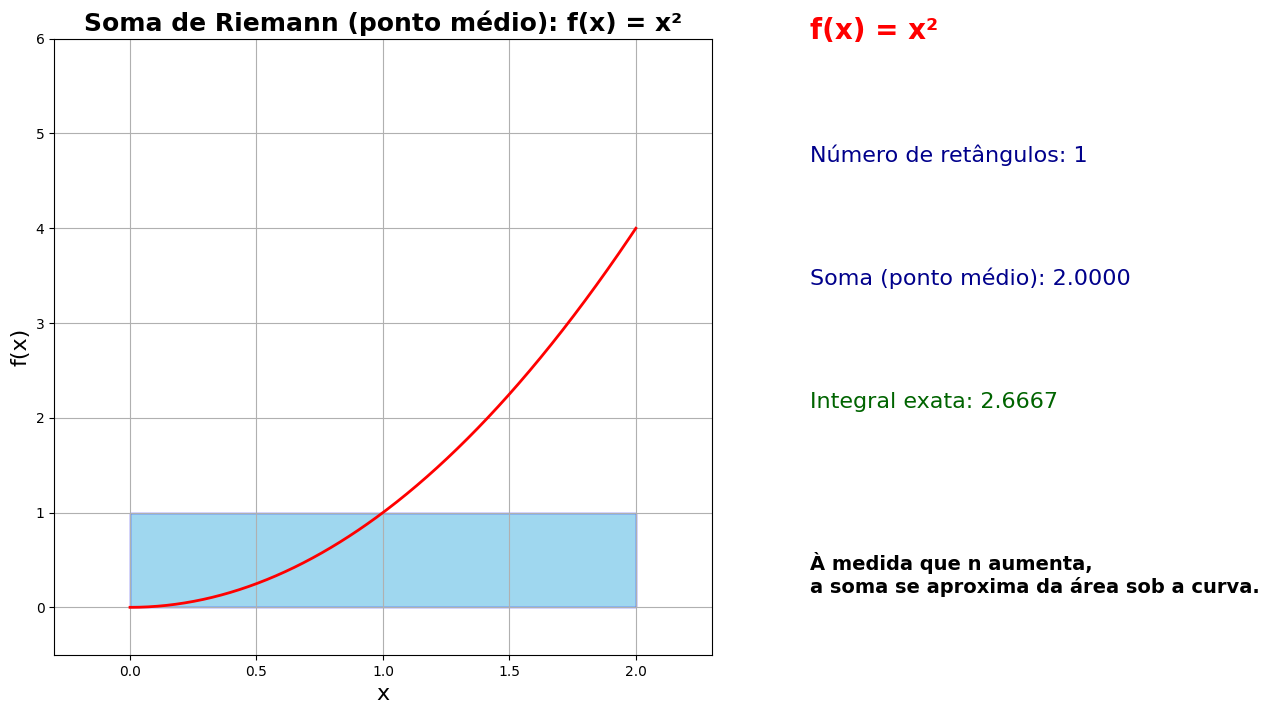

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

# Função a ser integrada
def f(x):
    return x**2

# Limites de integração
a = 0
b = 2

# Valor exato da integral de x² de 0 a 2
valor_exato = (b**3 / 3) - (a**3 / 3)

# Pontos para plotar a curva
x_curve = np.linspace(a, b, 500)
y_curve = f(x_curve)

# Valores de n (número de retângulos)
n_values = list(range(1, 11))  # n de 1 a 10
frames_data = []

# Gerar dados usando o método do ponto médio
for n in n_values:
    dx = (b - a) / n
    x_left = np.arange(a, b, dx)
    midpoints = x_left + dx / 2
    heights = f(midpoints)
    soma_riemann = np.sum(heights * dx)
    rects = []
    for x0, h in zip(x_left, heights):
        rects.append({
            'x': [x0, x0 + dx, x0 + dx, x0],
            'y': [0, 0, h, h],
            'n': n,
            'soma': soma_riemann
        })
    frames_data.append(rects)

# Repetir o primeiro frame 3 vezes
frame_sequence = [0, 0, 0] + list(range(1, len(n_values)))

# Criar figura com dois subplots (gráfico e texto)
fig, (ax_plot, ax_text) = plt.subplots(1, 2, figsize=(14, 8), gridspec_kw={'width_ratios': [2, 1]})

def update(frame_index):
    ax_plot.clear()
    ax_text.clear()

    frame = frame_sequence[frame_index]
    n = n_values[frame]
    rects = frames_data[frame]
    soma = rects[0]['soma']

    # Gráfico com retângulos
    for rect in rects:
        ax_plot.fill(rect['x'], rect['y'], facecolor='skyblue', edgecolor='blue', alpha=0.8)

    ax_plot.plot(x_curve, y_curve, color='red', linewidth=2)
    ax_plot.set_xlim(a - 0.3, b + 0.3)
    ax_plot.set_ylim(-0.5, max(y_curve) * 1.5)
    ax_plot.set_xlabel("x", fontsize=16)
    ax_plot.set_ylabel("f(x)", fontsize=16)
    ax_plot.set_title("Soma de Riemann (ponto médio): f(x) = x²", fontsize=18, weight='bold')
    ax_plot.grid(True)

    # Texto explicativo ao lado
    ax_text.axis('off')
    ax_text.text(0, 1.0, "f(x) = x²", fontsize=20, fontweight='bold', color='red')
    ax_text.text(0, 0.8, f"Número de retângulos: {n}", fontsize=16, color='darkblue')
    ax_text.text(0, 0.6, f"Soma (ponto médio): {soma:.4f}", fontsize=16, color='darkblue')
    ax_text.text(0, 0.4, f"Integral exata: {valor_exato:.4f}", fontsize=16, color='darkgreen')
    ax_text.text(0, 0.1, "À medida que n aumenta,\na soma se aproxima da área sob a curva.",
                 fontsize=14, fontweight='bold')

# Criar animação com sequência customizada
ani = animation.FuncAnimation(
    fig, update, frames=len(frame_sequence), repeat=False, interval=3000
)

# Salvar o vídeo
output_dir = "animacoes"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "soma_riemann_ponto_medio_fx2_com_pausa.mp4")
ani.save(output_path, writer='ffmpeg', fps=1)

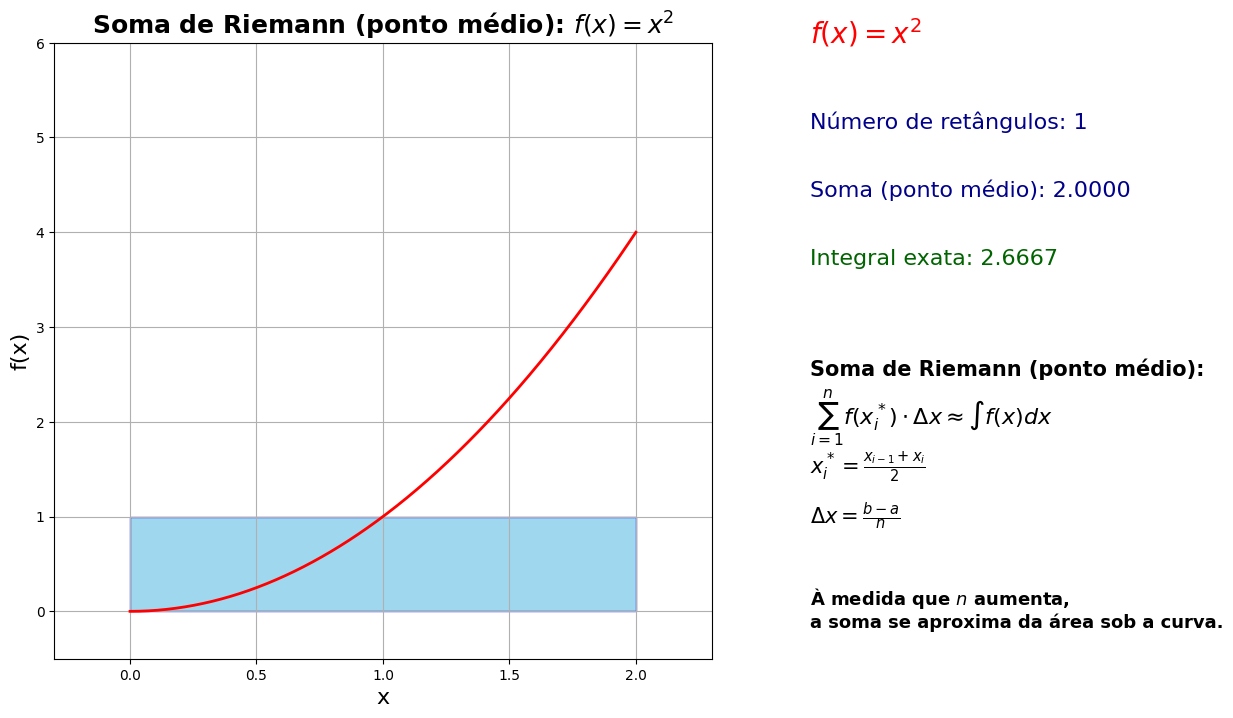

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

# Função a ser integrada
def f(x):
    return x**2

# Limites de integração
a = 0
b = 2

# Valor exato da integral de x² de 0 a 2
valor_exato = (b**3 / 3) - (a**3 / 3)

# Pontos para plotar a curva
x_curve = np.linspace(a, b, 500)
y_curve = f(x_curve)

# Valores de n (número de retângulos)
n_values = list(range(1, 11))  # n de 1 a 10
frames_data = []

# Gerar dados usando o método do ponto médio
for n in n_values:
    dx = (b - a) / n
    x_left = np.arange(a, b, dx)
    midpoints = x_left + dx / 2
    heights = f(midpoints)
    soma_riemann = np.sum(heights * dx)
    rects = []
    for x0, h in zip(x_left, heights):
        rects.append({
            'x': [x0, x0 + dx, x0 + dx, x0],
            'y': [0, 0, h, h],
            'n': n,
            'soma': soma_riemann
        })
    frames_data.append(rects)

# Repetir o primeiro frame 3 vezes
frame_sequence = [0, 0, 0] + list(range(1, len(n_values)))

# Criar figura com dois subplots (gráfico e texto)
fig, (ax_plot, ax_text) = plt.subplots(1, 2, figsize=(14, 8), gridspec_kw={'width_ratios': [2, 1]})

def update(frame_index):
    ax_plot.clear()
    ax_text.clear()

    frame = frame_sequence[frame_index]
    n = n_values[frame]
    rects = frames_data[frame]
    soma = rects[0]['soma']

    # Gráfico com retângulos
    for rect in rects:
        ax_plot.fill(rect['x'], rect['y'], facecolor='skyblue', edgecolor='blue', alpha=0.8)

    ax_plot.plot(x_curve, y_curve, color='red', linewidth=2)
    ax_plot.set_xlim(a - 0.3, b + 0.3)
    ax_plot.set_ylim(-0.5, max(y_curve) * 1.5)
    ax_plot.set_xlabel("x", fontsize=16)
    ax_plot.set_ylabel("f(x)", fontsize=16)
    ax_plot.set_title("Soma de Riemann (ponto médio): $f(x) = x^2$", fontsize=18, weight='bold')
    ax_plot.grid(True)

    # Texto explicativo ao lado
    ax_text.axis('off')
    ax_text.text(0, 1.00, r"$f(x) = x^2$", fontsize=20, fontweight='bold', color='red')
    ax_text.text(0, 0.86, f"Número de retângulos: {n}", fontsize=16, color='darkblue')
    ax_text.text(0, 0.75, f"Soma (ponto médio): {soma:.4f}", fontsize=16, color='darkblue')
    ax_text.text(0, 0.64, f"Integral exata: {valor_exato:.4f}", fontsize=16, color='darkgreen')

    # Definição em LaTeX
    ax_text.text(0, 0.46, r"Soma de Riemann (ponto médio):", fontsize=15, fontweight='bold')
    ax_text.text(0, 0.38, r"$\sum_{i=1}^{n} f(x_i^*) \cdot \Delta x \approx \int f(x) dx$", fontsize=16)
    ax_text.text(0, 0.30, r"$x_i^* = \frac{x_{i-1} + x_i}{2}$", fontsize=15)
    ax_text.text(0, 0.22, r"$\Delta x = \frac{b - a}{n}$", fontsize=15)

    # Conclusão
    ax_text.text(0, 0.05, "À medida que $n$ aumenta,\na soma se aproxima da área sob a curva.",
                 fontsize=13, fontweight='bold')

# Criar animação com sequência customizada
ani = animation.FuncAnimation(
    fig, update, frames=len(frame_sequence), repeat=False, interval=3000
)

# Salvar o vídeo
output_dir = "animacoes"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "soma_riemann_ponto_medio_latex.mp4")
# Salvar como MP4
mp4_path = os.path.join(output_dir, "soma_riemann_ponto_medio_latex.mp4")
ani.save(mp4_path, writer='ffmpeg', fps=1)

# Salvar como GIF
gif_path = os.path.join(output_dir, "soma_riemann_ponto_medio_latex.gif")
ani.save(gif_path, writer='pillow', fps=1)



'animacoes\\soma_riemann_short_vertical.mp4'

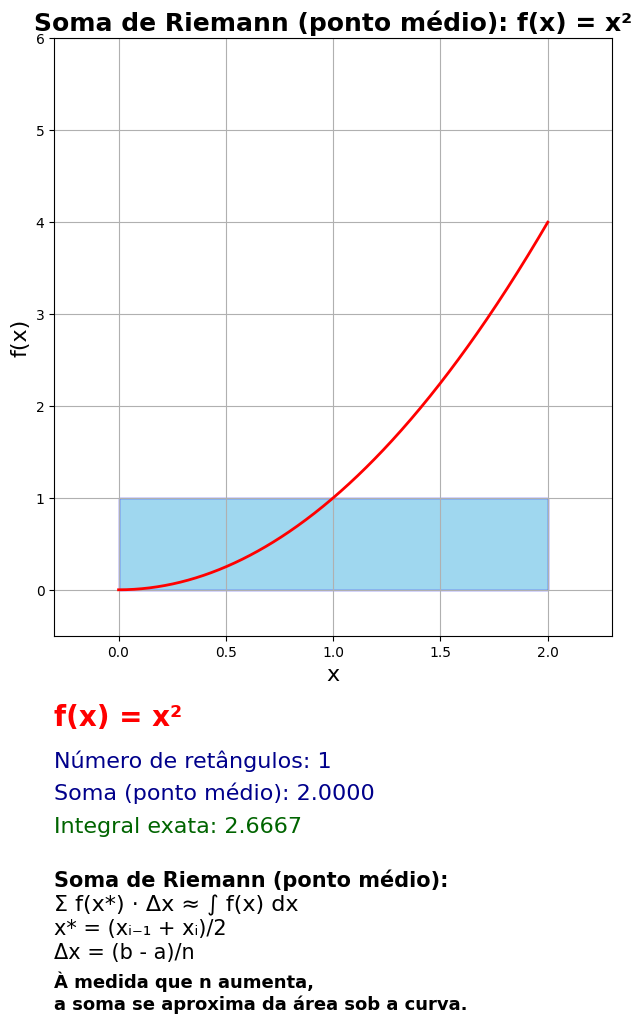

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

# Função a ser integrada
def f(x):
    return x**2

# Limites de integração
a = 0
b = 2

# Valor exato da integral de x² de 0 a 2
valor_exato = (b**3 / 3) - (a**3 / 3)

# Pontos para plotar a curva
x_curve = np.linspace(a, b, 500)
y_curve = f(x_curve)

# Valores de n (número de retângulos)
n_values = list(range(1, 11))  # n de 1 a 10
frames_data = []

# Gerar dados usando o método do ponto médio
for n in n_values:
    dx = (b - a) / n
    x_left = np.arange(a, b, dx)
    midpoints = x_left + dx / 2
    heights = f(midpoints)
    soma_riemann = np.sum(heights * dx)
    rects = []
    for x0, h in zip(x_left, heights):
        rects.append({
            'x': [x0, x0 + dx, x0 + dx, x0],
            'y': [0, 0, h, h],
            'n': n,
            'soma': soma_riemann
        })
    frames_data.append(rects)

# Repetir o primeiro frame 3 vezes
frame_sequence = [0, 0, 0] + list(range(1, len(n_values)))

# Criar figura em formato vertical (para Shorts: 9:16)
fig, (ax_plot, ax_text) = plt.subplots(2, 1, figsize=(7.2, 12.8), gridspec_kw={'height_ratios': [2, 1]})

def update(frame_index):
    ax_plot.clear()
    ax_text.clear()

    frame = frame_sequence[frame_index]
    n = n_values[frame]
    rects = frames_data[frame]
    soma = rects[0]['soma']

    # Gráfico com retângulos
    for rect in rects:
        ax_plot.fill(rect['x'], rect['y'], facecolor='skyblue', edgecolor='blue', alpha=0.8)

    ax_plot.plot(x_curve, y_curve, color='red', linewidth=2)
    ax_plot.set_xlim(a - 0.3, b + 0.3)
    ax_plot.set_ylim(-0.5, max(y_curve) * 1.5)
    ax_plot.set_xlabel("x", fontsize=16)
    ax_plot.set_ylabel("f(x)", fontsize=16)
    ax_plot.set_title("Soma de Riemann (ponto médio): f(x) = x²", fontsize=18, weight='bold')
    ax_plot.grid(True)

    # Texto explicativo abaixo
    ax_text.axis('off')
    ax_text.text(0, 1.00, "f(x) = x²", fontsize=20, fontweight='bold', color='red')
    ax_text.text(0, 0.86, f"Número de retângulos: {n}", fontsize=16, color='darkblue')
    ax_text.text(0, 0.75, f"Soma (ponto médio): {soma:.4f}", fontsize=16, color='darkblue')
    ax_text.text(0, 0.64, f"Integral exata: {valor_exato:.4f}", fontsize=16, color='darkgreen')
    ax_text.text(0, 0.46, "Soma de Riemann (ponto médio):", fontsize=15, fontweight='bold')
    ax_text.text(0, 0.38, "Σ f(x*) · Δx ≈ ∫ f(x) dx", fontsize=16)
    ax_text.text(0, 0.30, "x* = (xᵢ₋₁ + xᵢ)/2", fontsize=15)
    ax_text.text(0, 0.22, "Δx = (b - a)/n", fontsize=15)
    ax_text.text(0, 0.05, "À medida que n aumenta,\na soma se aproxima da área sob a curva.",
                 fontsize=13, fontweight='bold')

# Criar animação com sequência customizada
ani = animation.FuncAnimation(
    fig, update, frames=len(frame_sequence), repeat=False, interval=3000
)

# Salvar o vídeo como vertical (Short format)
output_dir = "animacoes"
os.makedirs(output_dir, exist_ok=True)
short_path = os.path.join(output_dir, "soma_riemann_short_vertical.mp4")
ani.save(short_path, writer='ffmpeg', fps=1)

short_path
